**Classification of Plant Diseases**

By: Ethan Rocheleau

For Introduction to Deep Learning Final Project

Referenced Dataset: www.kaggle.com/datasets/mohitsingh1804/plantvillage

**Introduction**

The problem I aim to solve is the automatic detection and classification of plant diseases using images of plant leaves. Early identification of plant diseases can help in timely intervention and management, minimizing the impact on crop yield and reducing economic losses. What excites us about this project is the potential to apply deep learning techniques to a real-world problem that has a significant impact on agriculture and food security.

**Goal/Objective** 

The primary objective of my project is to create a reliable and efficient deep learning model that can accurately detect and classify various plant diseases using leaf images. By achieving this goal, I aim to provide a valuable tool that assists farmers, agronomists, and other professionals in the agricultural domain to identify and address plant diseases promptly and effectively. This will ultimately contribute to improving crop yield, ensuring food security, and promoting sustainable agricultural practices.

**Background** 

The application of machine learning and deep learning techniques in the field of plant disease detection has gained significant attention in recent years, driven by the need for accurate and timely diagnosis to ensure optimal crop yield and food security. Here, I provide an expanded overview of notable works in this area:

Mohanty et al. (2016): In their pioneering work, Mohanty et al. used deep learning models, specifically convolutional neural networks (CNNs), to detect plant diseases on a large scale. They utilized the PlantVillage dataset and experimented with different CNN architectures, including AlexNet, GoogleNet, and VGGNet. Their best-performing model achieved an impressive accuracy of 99.35%. This study demonstrated the potential of deep learning for plant disease detection and laid the groundwork for future research in this domain.

Ferentinos (2018): Building on Mohanty et al.'s work, Ferentinos addressed the issue of data imbalance in plant disease classification by proposing a methodology that combined data augmentation, transfer learning, and ensemble learning. The author experimented with various data augmentation techniques to generate a more balanced dataset. The study showed that addressing data imbalance and using ensemble learning can significantly improve classification performance in plant disease detection.

My project aims to build upon these previous works by utilizing state-of-the-art deep learning models and methodologies to further improve the accuracy of plant disease classification. By integrating transfer learning and data augmentation techniques, I hope to develop a robust and accurate model capable of detecting and classifying plant diseases from leaf images.

**Data** 

I plan to use the PlantVillage dataset, containing more than 50,000 images of healthy and diseased plant leaves across 38 different classes. This dataset is chosen for its comprehensiveness and variety, making it suitable for training a robust deep learning model for plant disease classification.

The PlantVillage dataset is a comprehensive and diverse collection of images focused on plant diseases. It consists of more than 50,000 colored images of plant leaves, with each image labeled as healthy or as having one of 37 types of diseases. The dataset covers 14 crop species, including apple, grape, corn, potato, and tomato, making it highly relevant to global agriculture.

To better understand the data and identify any pre-processing requirements, I will analyze the distribution of images across classes to identify any class imbalance. I will also investigate the key features that distinguish different plant diseases, such as shape, color, and texture patterns. This will provide insights into which CNN layers or architectures may be most effective in capturing these features for classification.

By carefully examining and pre-processing the PlantVillage dataset, I can ensure that my deep learning models are trained on high-quality data that is representative of real-world plant disease scenarios, ultimately resulting in more accurate and reliable disease classification models.

**Methods**

I intend to apply convolutional neural networks (CNN) for this task. I will start with a pre-trained model (e.g., ResNet, VGG, or Inception) and fine-tune it for the specific problem using transfer learning.

**Experiments**

I plan to run experiments on different pre-trained models and assess their performance for plant disease classification. I will also explore data augmentation techniques to improve the model's generalization capabilities. The evaluation metrics will include accuracy, precision, recall, F1-score, and confusion matrix. Baselines for comparison could include traditional machine learning methods (e.g., SVM, Random Forest) or simpler deep learning models.

**Model Selection and Fine-tuning**

I plan to experiment with different pre-trained models such as ResNet, VGG, and Inception to find the most suitable one for plant disease classification. These models have demonstrated strong performance in image classification tasks, and using transfer learning, I can fine-tune them to perform well on my specific problem. The fine-tuning process will involve training the models on the PlantVillage dataset while freezing the early layers and updating the later layers to adapt to my classification task. This allows us to leverage the pre-existing feature extraction capabilities of the pre-trained models while adapting the final layers to my specific problem.

**Data Augmentation**

To increase the diversity of my dataset and improve model generalization, I will experiment with various data augmentation techniques such as rotation, flipping, scaling, and color transformation. These techniques will generate new training samples by applying small transformations to the original images, thereby increasing the amount of training data available and reducing the risk of overfitting.

Based on the feedback received, I have decided to focus on data distribution and feature extraction in the data section, and model selection and data augmentation in the experiments section. I believe these areas are the most crucial for achieving my project goals within a shorter timeframe. By carefully selecting the pre-trained models and applying appropriate data augmentation techniques, I can develop a reliable and efficient deep learning model that accurately detects and classifies plant diseases from leaf images.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import WeightedRandomSampler

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Set the path to the PlantVillage dataset directory
data_dir = './PlantVillage'

# Define the subdirectories for the different datasets
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Define the batch size for the data loader
batch_size = 32

# Define the size of the input images
img_height = 224
img_width = 224

# Define the transformations for data pre-processing and augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(img_height, img_width)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(size=(img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(size=(img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the train, validation, and test datasets
train_dataset = ImageFolder(train_dir, transform=train_transform)
val_dataset = ImageFolder(val_dir, transform=val_transform)
test_dataset = ImageFolder(test_dir, transform=test_transform)

Class distribution in the training dataset:
Apple___Apple_scab: 429 images
Apple___Black_rot: 421 images
Apple___Cedar_apple_rust: 187 images
Apple___healthy: 1119 images
Blueberry___healthy: 1022 images
Cherry_(including_sour)___Powdery_mildew: 716 images
Cherry_(including_sour)___healthy: 582 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 349 images
Corn_(maize)___Common_rust_: 811 images
Corn_(maize)___Northern_Leaf_Blight: 670 images
Corn_(maize)___healthy: 790 images
Grape___Black_rot: 803 images
Grape___Esca_(Black_Measles): 941 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 732 images
Grape___healthy: 289 images
Orange___Haunglongbing_(Citrus_greening): 3745 images
Peach___Bacterial_spot: 1563 images
Peach___healthy: 245 images
Pepper,_bell___Bacterial_spot: 678 images
Pepper,_bell___healthy: 1006 images
Potato___Early_blight: 680 images
Potato___Late_blight: 680 images
Potato___healthy: 103 images
Raspberry___healthy: 253 images
Soybean___healthy: 3462 images
Sq

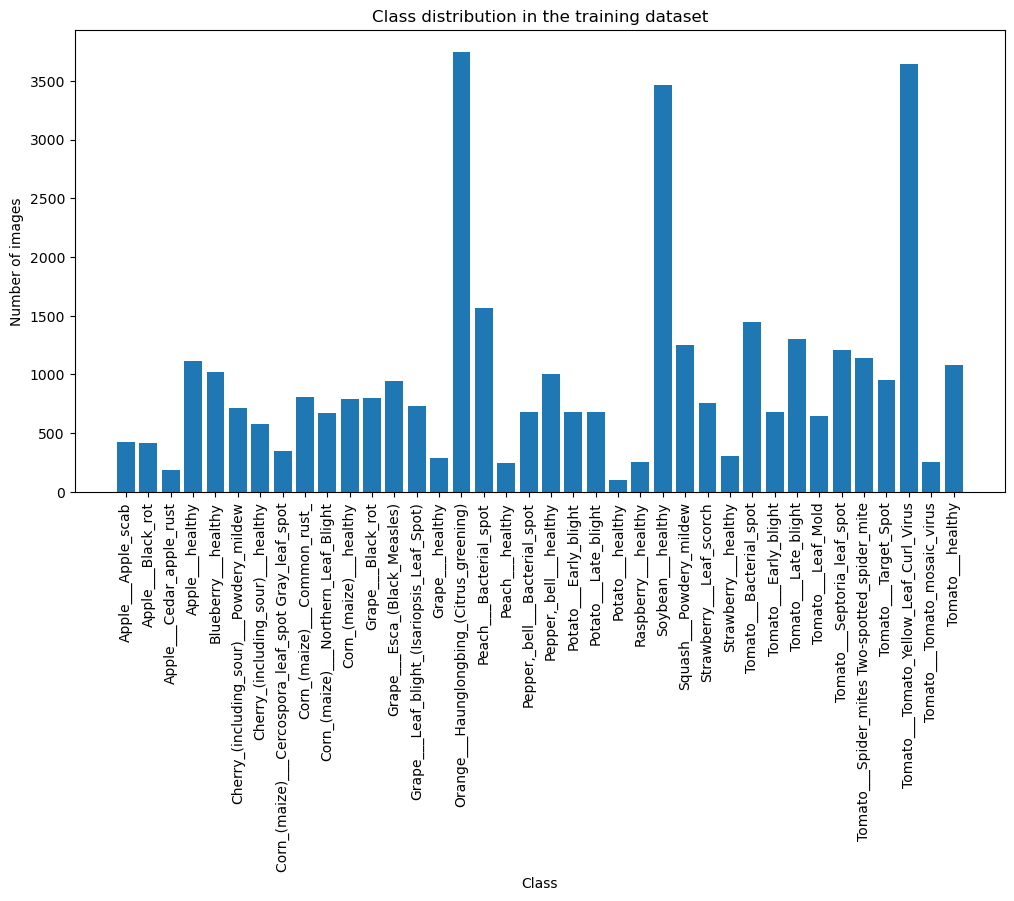

In [5]:
# Count the number of images in each class
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)
class_counts = [0] * num_classes
for _, label in train_dataset:
    class_counts[label] += 1

total_count = sum(class_counts)
class_weights = [total_count / (num_classes * count) for count in class_counts]

# Print the class distribution
print('Class distribution in the training dataset:')
for i in range(num_classes):
    print('{}: {} images'.format(class_names[i], class_counts[i]))

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts)
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Class distribution in the training dataset')
plt.show()

In [6]:
# Create a sampler for the training data with replacement, based on the sample weights
sample_weights = [class_weights[label] for _, label in train_dataset]
sampler = WeightedRandomSampler(sample_weights, len(train_dataset), replacement=True)

In [7]:
num_workers = 8

# Create the train, validation, and test data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

# Create the augmented train dataset
augmented_train_dataset = ImageFolder(train_dir, transform=train_transform)

# Combine the original and augmented train datasets
combined_train_dataset = torch.utils.data.ConcatDataset([train_dataset, augmented_train_dataset])

# Create the combined train data loader
combined_train_loader = DataLoader(combined_train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

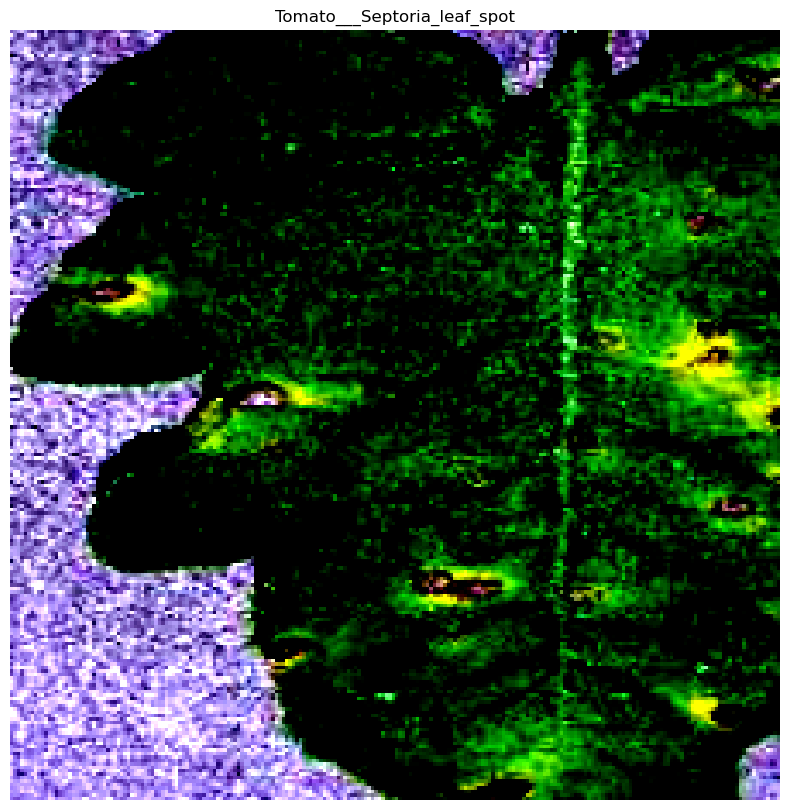

In [26]:
# Plot a few example images from the dataset
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
for images, labels in train_loader:
    # Clip the pixel values to [0, 1] range
    images = np.clip(np.transpose(images[0], (1, 2, 0)), 0, 1)
    axs.imshow(images)
    axs.set_title(class_names[labels[0]])
    axs.axis('off')
    break

plt.show()

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50
from torch.utils.data import DataLoader
from torchsummary import summary

# Define the device to run the model on
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained ResNet-50 model and freeze the early layers
model = resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer with a new layer for the specific classification task
num_classes = 38
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

# Move the model to the device
model = model.to(device)

# Print the model summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [10]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Define the number of epochs and the batch size
num_epochs = 10
batch_size = 32

# Define the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [11]:
# Train the model with the combined dataset
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in combined_train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(combined_train_dataset)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))
    
    # Update the learning rate
    scheduler.step()

    # Evaluate the model on the validation set
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = 100 * correct / total
    print('Validation Accuracy: {:.2f}%'.format(val_acc))

Epoch [1/10], Loss: 1.4215
Validation Accuracy: 7.27%
Epoch [2/10], Loss: 0.8394
Validation Accuracy: 7.16%
Epoch [3/10], Loss: 0.7222
Validation Accuracy: 6.69%
Epoch [4/10], Loss: 0.6669
Validation Accuracy: 6.75%
Epoch [5/10], Loss: 0.6163
Validation Accuracy: 6.57%
Epoch [6/10], Loss: 0.5952
Validation Accuracy: 6.59%
Epoch [7/10], Loss: 0.5719
Validation Accuracy: 6.50%
Epoch [8/10], Loss: 0.5559
Validation Accuracy: 6.62%
Epoch [9/10], Loss: 0.5541
Validation Accuracy: 6.47%
Epoch [10/10], Loss: 0.5507
Validation Accuracy: 6.58%


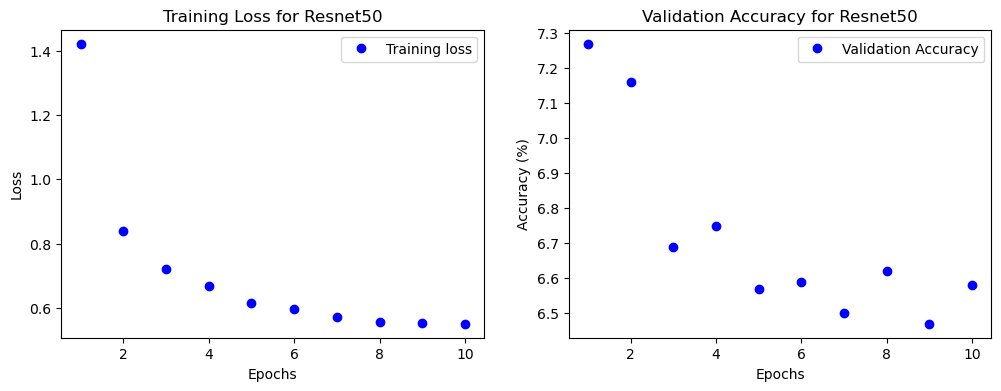

In [21]:
import matplotlib.pyplot as plt

# Store loss and validation accuracy values
loss_values = [1.4215, 0.8394, 0.7222, 0.6669, 0.6163, 0.5952, 0.5719, 0.5559, 0.5541, 0.5507]
val_acc_values = [7.27, 7.16, 6.69, 6.75, 6.57, 6.59, 6.50, 6.62, 6.47, 6.58]

# Plot loss and validation accuracy over epochs
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training Loss for Resnet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_acc_values, 'bo', label='Validation Accuracy')
plt.title('Validation Accuracy for Resnet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [23]:
from torchvision.models import vgg16

# Load the pre-trained VGG-16 model and freeze the early layers
vgg_model = vgg16(pretrained=True)
for param in vgg_model.features.parameters():
    param.requires_grad = False

# Replace the final layer with a new layer for the specific classification task
num_classes = 38
vgg_model.classifier[6] = nn.Linear(4096, num_classes)

# Move the model to the device
vgg_model = vgg_model.to(device)

# Define the loss function and optimizer for the VGG model
vgg_criterion = nn.CrossEntropyLoss()
vgg_optimizer = optim.SGD(vgg_model.classifier.parameters(), lr=0.001, momentum=0.9)

# Define the learning rate scheduler for the VGG model
vgg_scheduler = optim.lr_scheduler.StepLR(vgg_optimizer, step_size=7, gamma=0.1)

In [24]:
# Train the VGG model with the combined dataset
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in combined_train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        vgg_optimizer.zero_grad()
        outputs = vgg_model(inputs)
        loss = vgg_criterion(outputs, labels)
        loss.backward()
        vgg_optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    # Update the learning rate
    vgg_scheduler.step()

    epoch_loss = running_loss / len(combined_train_dataset)
    print('VGG Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

    # Evaluate the VGG model on the validation set
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg_model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = 100 * correct / total
    print('VGG Validation Accuracy: {:.2f}%'.format(val_acc))

VGG Epoch [1/10], Loss: 1.1270
VGG Validation Accuracy: 79.98%
VGG Epoch [2/10], Loss: 0.7283
VGG Validation Accuracy: 86.15%
VGG Epoch [3/10], Loss: 0.6348
VGG Validation Accuracy: 86.96%
VGG Epoch [4/10], Loss: 0.5778
VGG Validation Accuracy: 89.41%
VGG Epoch [5/10], Loss: 0.5427
VGG Validation Accuracy: 89.11%
VGG Epoch [6/10], Loss: 0.5172
VGG Validation Accuracy: 90.97%
VGG Epoch [7/10], Loss: 0.4910
VGG Validation Accuracy: 90.65%
VGG Epoch [8/10], Loss: 0.4493
VGG Validation Accuracy: 91.70%
VGG Epoch [9/10], Loss: 0.4310
VGG Validation Accuracy: 91.93%
VGG Epoch [10/10], Loss: 0.4247
VGG Validation Accuracy: 92.04%


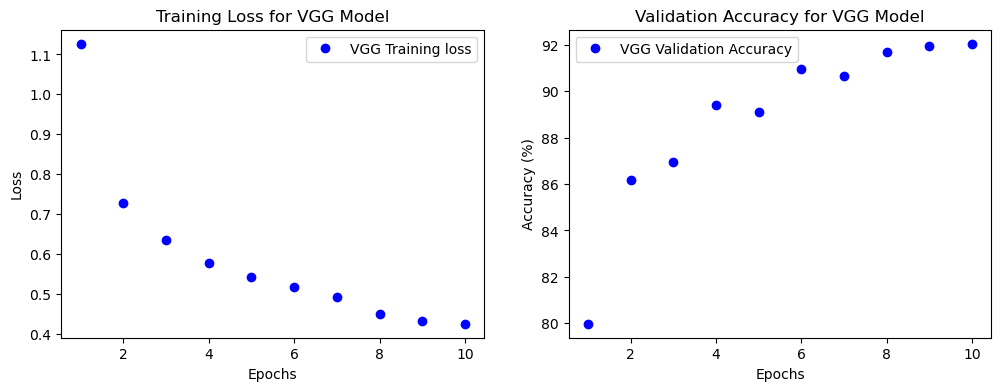

In [26]:
# Store loss and validation accuracy values for VGG model
vgg_loss_values = [1.1270, 0.7283, 0.6348, 0.5778, 0.5427, 0.5172, 0.4910, 0.4493, 0.4310, 0.4247]
vgg_val_acc_values = [79.98, 86.15, 86.96, 89.41, 89.11, 90.97, 90.65, 91.70, 91.93, 92.04]

# Plot loss and validation accuracy over epochs for VGG model
vgg_epochs = range(1, len(vgg_loss_values) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(vgg_epochs, vgg_loss_values, 'bo', label='VGG Training loss')
plt.title('Training Loss for VGG Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(vgg_epochs, vgg_val_acc_values, 'bo', label='VGG Validation Accuracy')
plt.title('Validation Accuracy for VGG Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

In [28]:
from torchvision.models import googlenet

# Load the pre-trained GoogLeNet model and freeze the early layers
googlenet_model = googlenet(pretrained=True)
for param in googlenet_model.parameters():
    param.requires_grad = False

# Replace the final layer with a new layer for the specific classification task
num_classes = 38
in_features = googlenet_model.fc.in_features
googlenet_model.fc = nn.Linear(in_features, num_classes)

# Move the model to the device
googlenet_model = googlenet_model.to(device)

# Define the loss function and optimizer
googlenet_criterion = nn.CrossEntropyLoss()
googlenet_optimizer = optim.SGD(googlenet_model.fc.parameters(), lr=0.001, momentum=0.9)

# Train the GoogLeNet model with the combined dataset
num_epochs = 10

# Define the learning rate scheduler for the Inception model
googlenet_scheduler = optim.lr_scheduler.StepLR(googlenet_optimizer, step_size=7, gamma=0.1)

In [29]:
# Train the Inception/googlenet model with the combined dataset
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in combined_train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        googlenet_optimizer.zero_grad()
        outputs = googlenet_model(inputs)
        loss = googlenet_criterion(outputs, labels)
        loss.backward()
        googlenet_optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    # Update the learning rate
    googlenet_scheduler.step()

    epoch_loss = running_loss / len(combined_train_dataset)
    print('GoogLeNet Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))


    # Evaluate the GoogLeNet model on the validation set
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = googlenet_model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = 100 * correct / total
    print('GoogLeNet Validation Accuracy: {:.2f}%'.format(val_acc))

GoogLeNet Epoch [1/10], Loss: 1.9445
GoogLeNet Validation Accuracy: 8.30%
GoogLeNet Epoch [2/10], Loss: 1.2367
GoogLeNet Validation Accuracy: 7.38%
GoogLeNet Epoch [3/10], Loss: 1.0419
GoogLeNet Validation Accuracy: 7.16%
GoogLeNet Epoch [4/10], Loss: 0.9423
GoogLeNet Validation Accuracy: 7.21%
GoogLeNet Epoch [5/10], Loss: 0.8902
GoogLeNet Validation Accuracy: 7.08%
GoogLeNet Epoch [6/10], Loss: 0.8483
GoogLeNet Validation Accuracy: 7.12%
GoogLeNet Epoch [7/10], Loss: 0.8226
GoogLeNet Validation Accuracy: 6.75%
GoogLeNet Epoch [8/10], Loss: 0.7964
GoogLeNet Validation Accuracy: 6.51%
GoogLeNet Epoch [9/10], Loss: 0.7938
GoogLeNet Validation Accuracy: 6.59%
GoogLeNet Epoch [10/10], Loss: 0.7984
GoogLeNet Validation Accuracy: 6.84%


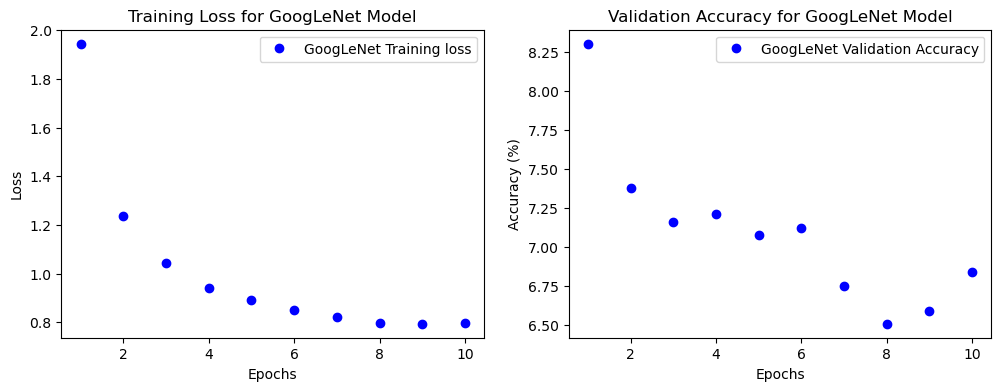

In [30]:
# Store loss and validation accuracy values for GoogLeNet model
googlenet_loss_values = [1.9445, 1.2367, 1.0419, 0.9423, 0.8902, 0.8483, 0.8226, 0.7964, 0.7938, 0.7984]
googlenet_val_acc_values = [8.30, 7.38, 7.16, 7.21, 7.08, 7.12, 6.75, 6.51, 6.59, 6.84]

# Plot loss and validation accuracy over epochs for GoogLeNet model
googlenet_epochs = range(1, len(googlenet_loss_values) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(googlenet_epochs, googlenet_loss_values, 'bo', label='GoogLeNet Training loss')
plt.title('Training Loss for GoogLeNet Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(googlenet_epochs, googlenet_val_acc_values, 'bo', label='GoogLeNet Validation Accuracy')
plt.title('Validation Accuracy for GoogLeNet Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

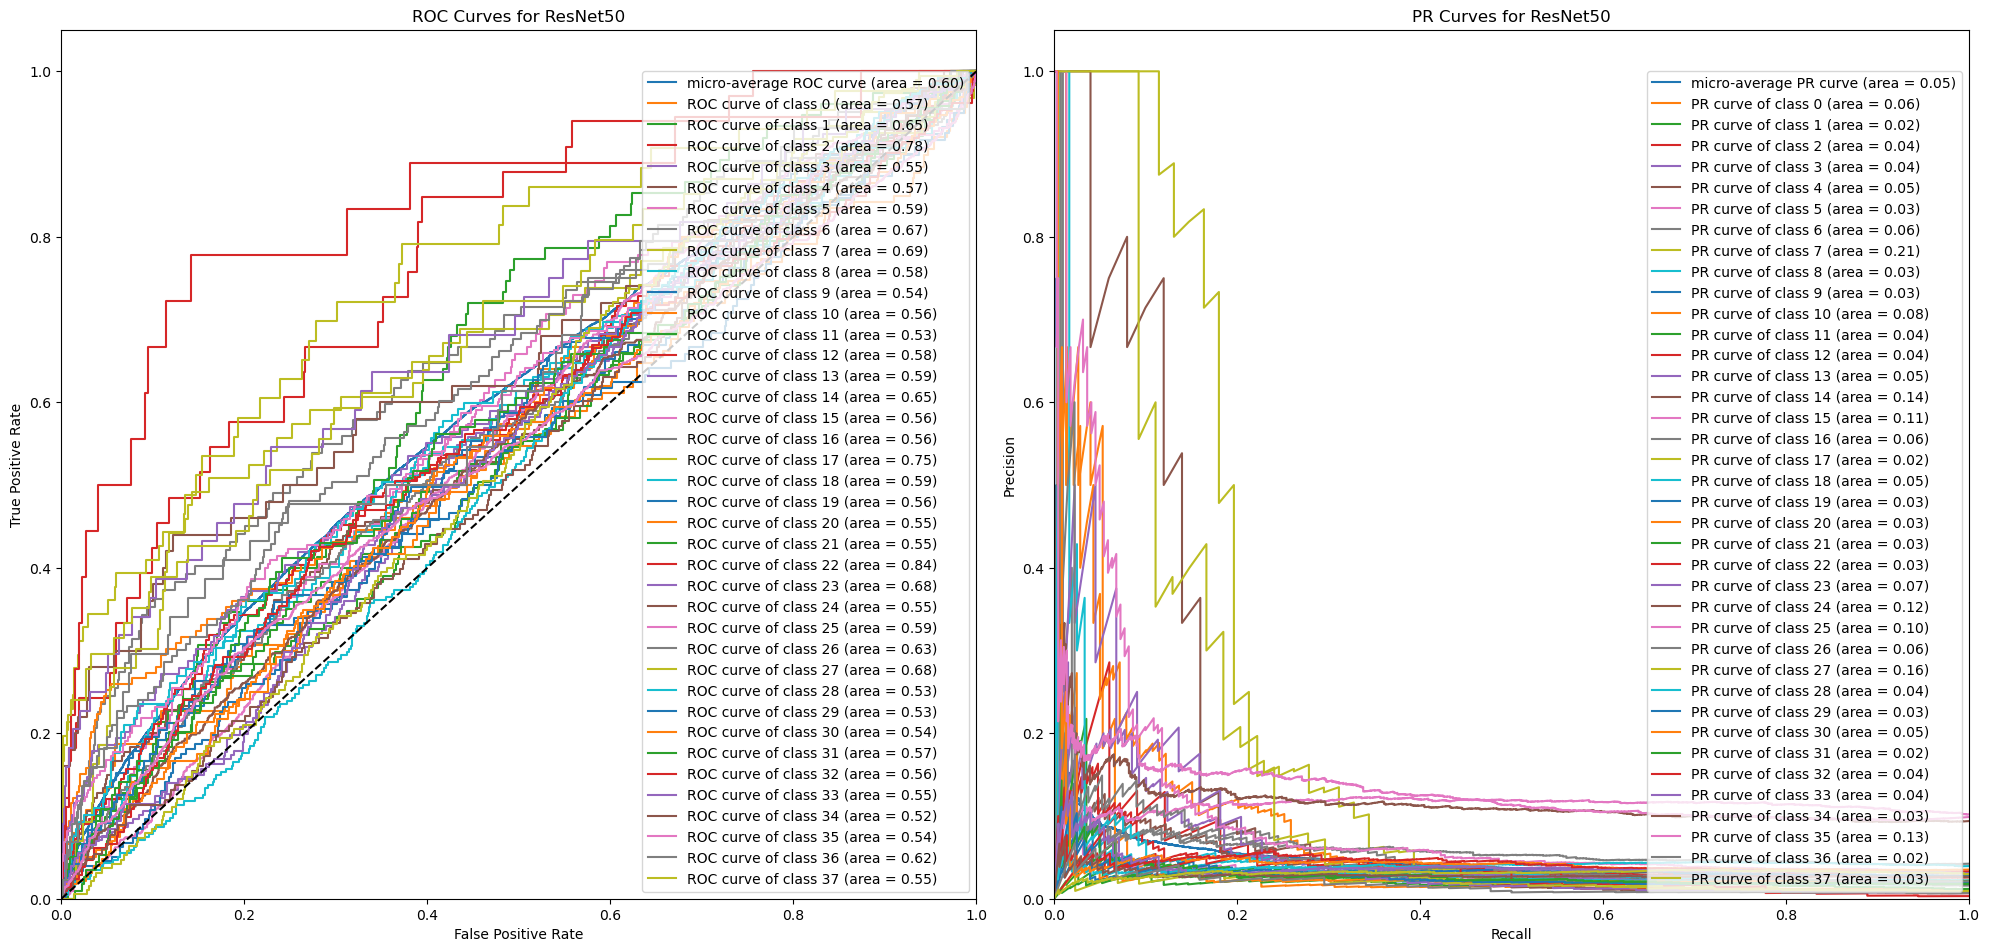

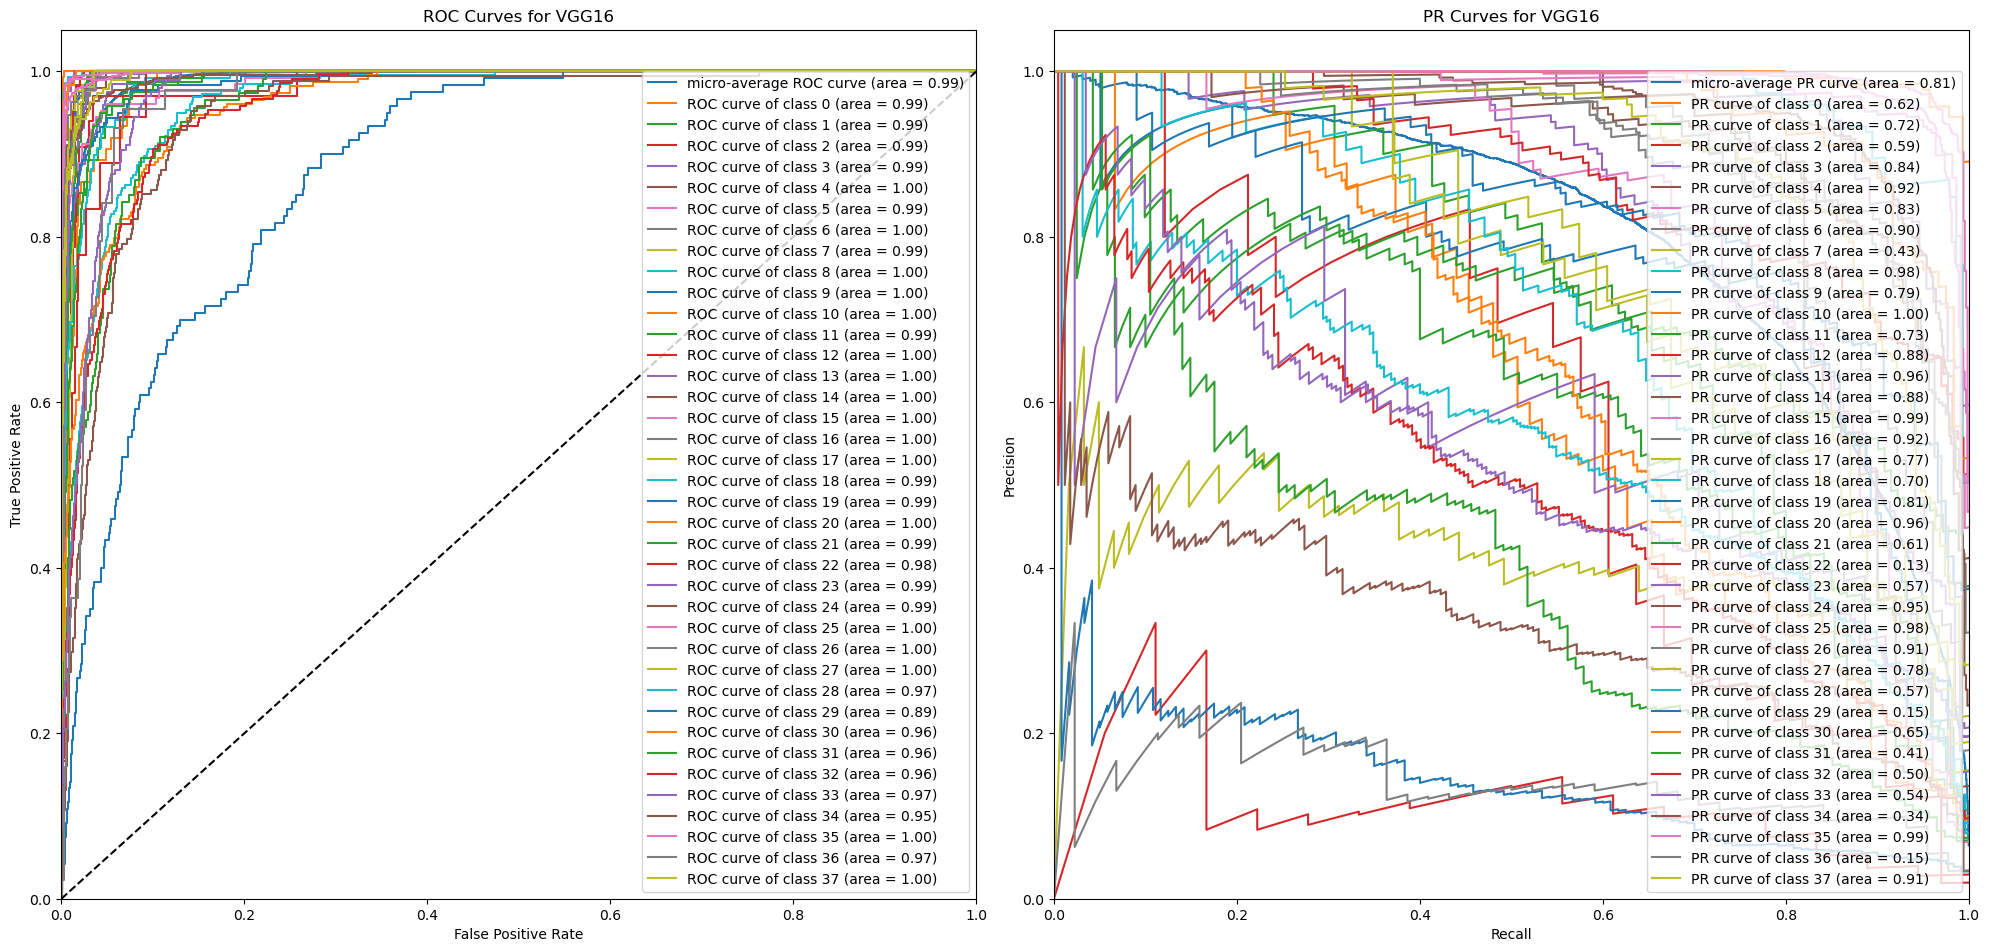

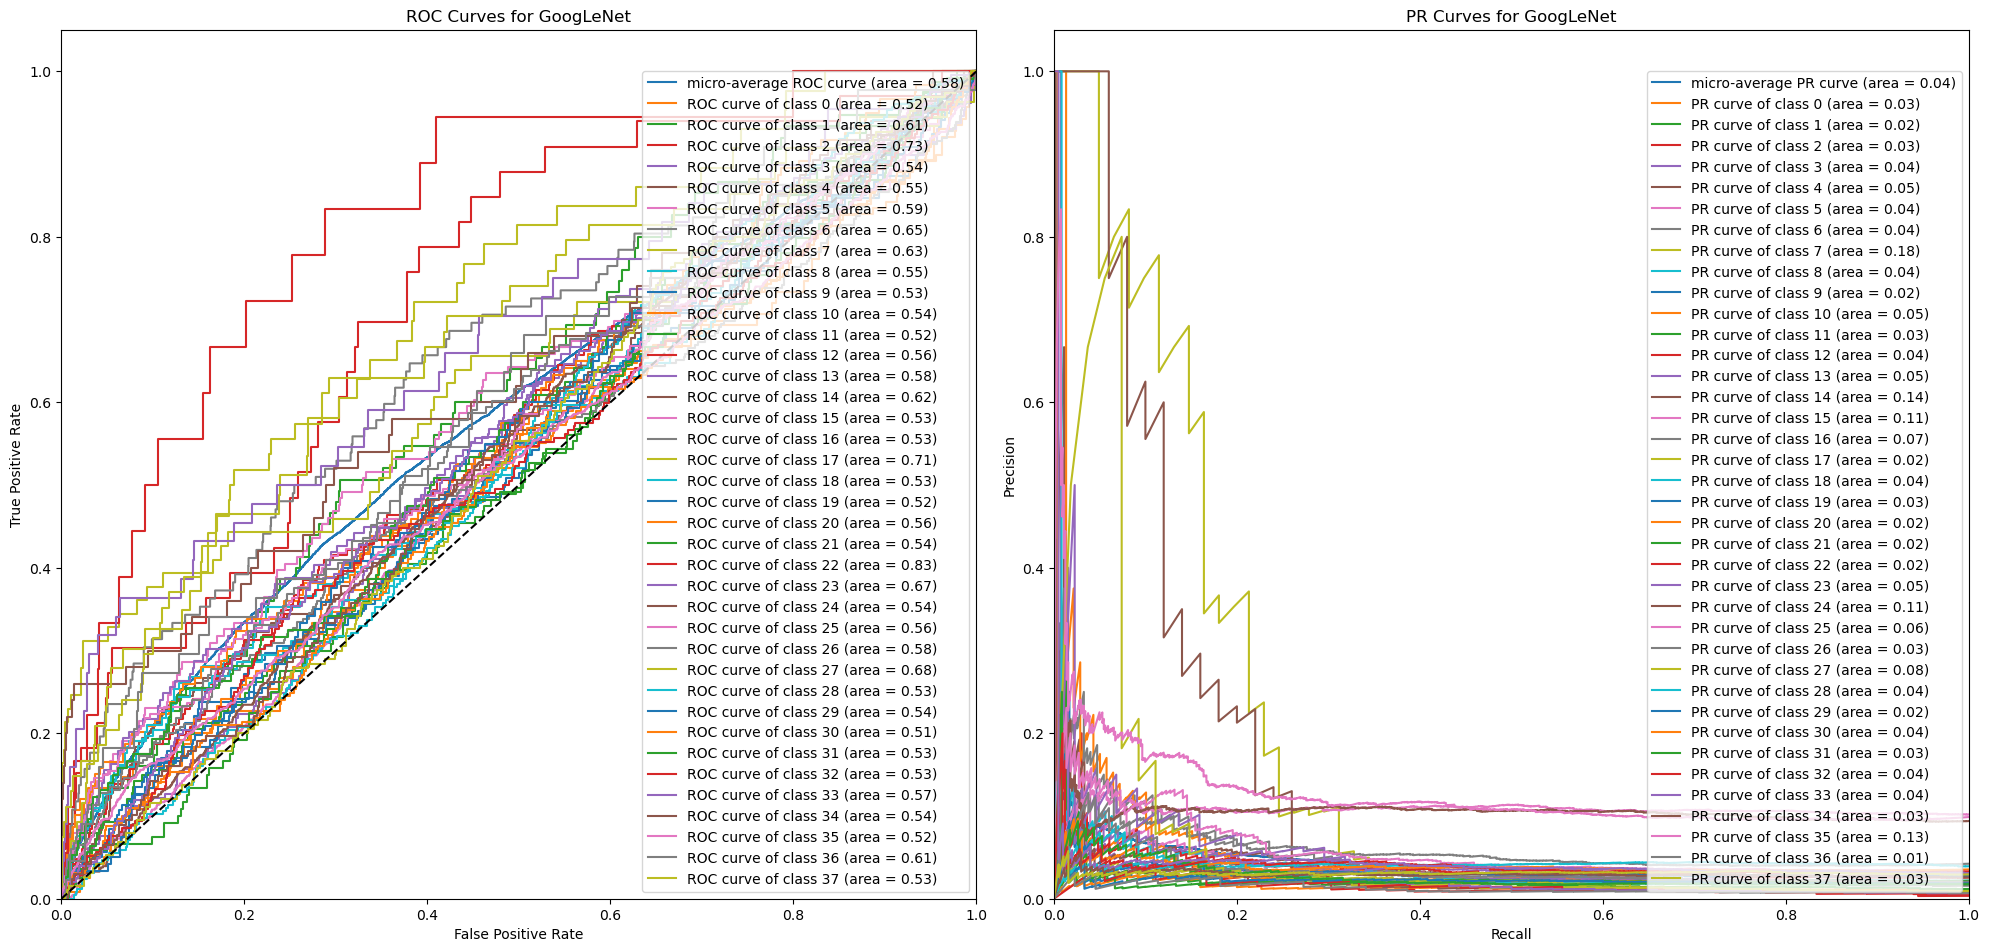

In [31]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import scikitplot as skplt
import matplotlib.pyplot as plt

# Define a function to evaluate the model and plot ROC, PR curves, and confusion matrix
def evaluate_and_plot(model, test_loader, model_name, num_classes):
    y_true = []
    y_pred = []
    y_pred_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            y_pred_scores.extend(outputs.cpu().numpy())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_pred_scores = np.array(y_pred_scores)

    # Binarize the output
    y_true_bin = label_binarize(y_true, classes=[i for i in range(num_classes)])

    # Calculate ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calculate micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Calculate PR curve and average precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_pred_scores[:, i])
        average_precision[i] = average_precision_score(y_true == i, y_pred_scores[:, i])

    # Calculate micro-average PR curve and average precision
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_bin.ravel(), y_pred_scores.ravel())
    average_precision["micro"] = average_precision_score(y_true_bin, y_pred_scores, average="micro")

    # Plot ROC and PR curves
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for {}'.format(model_name))
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall["micro"], precision["micro"], label='micro-average PR curve (area = {0:0.2f})'.format(average_precision["micro"]))
    for i in range(num_classes):
        plt.plot(recall[i], precision[i], label='PR curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curves for {}'.format(model_name))
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# Call the function for each model
evaluate_and_plot(model, test_loader, 'ResNet50', num_classes)
evaluate_and_plot(vgg_model, test_loader, 'VGG16', num_classes)
evaluate_and_plot(googlenet_model, test_loader, 'GoogLeNet', num_classes)